In [1]:
# Load the dataset, get the desired values only.
# Make the points into categorical data
# USe smoot
# train 
# evaluate.

# 'protocol'
# 'flow_duration'
# 'tot_fwd_pkts'
# 'tot_bwd_pkts'
# 'totlen_fwd_pkts'
# 'totlen_bwd_pkts'
# 'fwd_pkt_len_mean'
# 'fwd_pkt_len_std'
# 'bwd_pkt_len_mean'
# 'flow_byts_s'
# 'flow_pkts_s'
# 'flow_iat_std'
# 'flow_iat_min'
# 'fwd_iat_tot'
# 'fwd_iat_min'
# 'bwd_iat_tot'
# 'bwd_iat_min'
# 'fwd_psh_flags'
# 'fwd_urg_flags'
# 'bwd_pkts_s'
# 'fin_flag_cnt'
# 'rst_flag_cnt'
# 'psh_flag_cnt'
# 'ack_flag_cnt'
# 'urg_flag_cnt'
# 'down_up_ratio'
# 'init_fwd_win_byts'
# 'init_bwd_win_byts'
# 'fwd_seg_size_min'
# 'active_mean'
# 'idle_mean'


# label

In [2]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('bot_02-03-2018.csv')
data.head()

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [4]:
data['label'].value_counts()

label
Benign    762384
Bot       286191
Name: count, dtype: int64

In [5]:
cols = [
    'protocol',
'flow_duration',
'tot_fwd_pkts',
'tot_bwd_pkts',
'totlen_fwd_pkts',
'totlen_bwd_pkts',
'fwd_pkt_len_mean',
'fwd_pkt_len_std',
'bwd_pkt_len_mean',
'flow_byts_s',
'flow_pkts_s',
'flow_iat_std',
'flow_iat_min',
'fwd_iat_tot',
'fwd_iat_min',
'bwd_iat_tot',
'bwd_iat_min',
'fwd_psh_flags',
'fwd_urg_flags',
'bwd_pkts_s',
'fin_flag_cnt',
'rst_flag_cnt',
'psh_flag_cnt',
'ack_flag_cnt',
'urg_flag_cnt',
'down_up_ratio',
'init_fwd_win_byts',
'init_bwd_win_byts',
'fwd_seg_size_min',
'active_mean',
'idle_mean',
'label'
]

In [6]:
df_new = data[cols]
df_new

,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_mean,fwd_pkt_len_std,bwd_pkt_len_mean,flow_byts_s,...,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,down_up_ratio,init_fwd_win_byts,init_bwd_win_byts,fwd_seg_size_min,active_mean,idle_mean,label
0,6,141385,9,7,553,3773.0,61.444444,87.534438,539.000000,30597.305230,...,1,0,0,0,8192,119,20,0.0,0.0,Benign
1,6,281,2,1,38,0.0,19.000000,26.870058,0.000000,135231.316700,...,0,1,0,0,123,0,20,0.0,0.0,Benign
2,6,279824,11,15,1086,10527.0,98.727273,129.392497,701.800000,41501.086400,...,1,0,0,1,8192,1047,20,0.0,0.0,Benign
3,6,132,2,0,0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,256,-1,20,0.0,0.0,Benign
4,6,274016,9,13,1285,6141.0,142.777778,183.887722,472.384615,27100.607260,...,1,0,0,1,8192,1047,20,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,6,3982183,14,8,1442,1731.0,103.000000,191.125412,216.375000,796.799143,...,1,0,0,0,8192,62558,20,0.0,0.0,Benign
1048571,6,3802316,14,8,1440,1731.0,102.857143,191.172841,216.375000,833.965404,...,1,0,0,0,8192,62560,20,0.0,0.0,Benign
1048572,6,4004239,14,8,1459,1731.0,104.214286,195.113450,216.375000,796.655744,...,1,0,0,0,8192,62626,20,0.0,0.0,Benign
1048573,6,3998435,14,8,1459,1731.0,104.214286,195.113450,216.375000,797.812144,...,1,0,0,0,8192,62541,20,0.0,0.0,Benign


In [7]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [8]:
df_new['protocol'] = LE.fit_transform(df_new['protocol'])
df_new['label'] = LE.fit_transform(df_new['label'])

/var/folders/ld/bwffsrf52mnfq4_gy_k9p9480000gn/T/ipykernel_48081/3086081652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['protocol'] = LE.fit_transform(df_new['protocol'])
/var/folders/ld/bwffsrf52mnfq4_gy_k9p9480000gn/T/ipykernel_48081/3086081652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['label'] = LE.fit_transform(df_new['label'])


In [9]:
df_new['protocol'].value_counts()

protocol
1    832492
2    202701
0     13382
Name: count, dtype: int64

In [10]:
threshold = pd.to_numeric(np.finfo(np.float64).max)

# Remove rows with any value greater than float64
df_new = df_new[(df_new <= threshold).all(axis=1)]

print("DataFrame after removing rows with any value greater than float64:")
print(df_new)

DataFrame after removing rows with any value greater than float64:
         protocol  flow_duration  tot_fwd_pkts  tot_bwd_pkts  totlen_fwd_pkts  \
0               1         141385             9             7              553   
1               1            281             2             1               38   
2               1         279824            11            15             1086   
3               1            132             2             0                0   
4               1         274016             9            13             1285   
...           ...            ...           ...           ...              ...   
1048570         1        3982183            14             8             1442   
1048571         1        3802316            14             8             1440   
1048572         1        4004239            14             8             1459   
1048573         1        3998435            14             8             1459   
1048574         1        3972651          

In [11]:
columns_with_na = df_new.columns[df_new.isna().any()].tolist()
print("Columns with NaN values:", columns_with_na)

Columns with NaN values: []


In [12]:
df_new = df_new.dropna()

In [13]:
columns_with_na = df_new.columns[df_new.isna().any()].tolist()
print("Columns with NaN values:", columns_with_na)

Columns with NaN values: []


/var/folders/ld/bwffsrf52mnfq4_gy_k9p9480000gn/T/ipykernel_48081/2687928747.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df_new['label']).plot.bar()


label
0    758334
1    286191
Name: count, dtype: int64

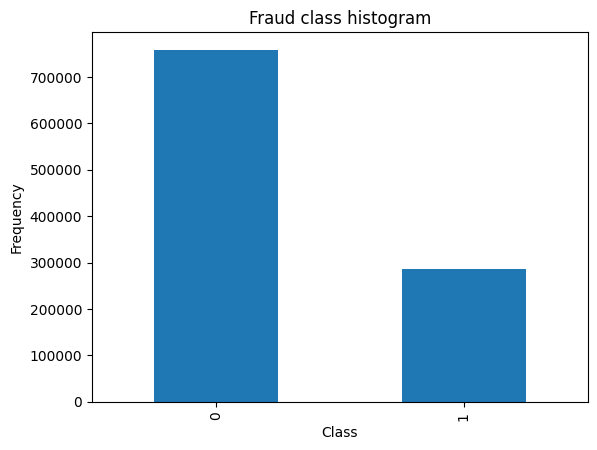

In [14]:
pd.value_counts(df_new['label']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df_new['label'].value_counts()

In [15]:
cols_x = [
    'protocol',
'flow_duration',
'tot_fwd_pkts',
'tot_bwd_pkts',
'totlen_fwd_pkts',
'totlen_bwd_pkts',
'fwd_pkt_len_mean',
'fwd_pkt_len_std',
'bwd_pkt_len_mean',
'flow_byts_s',
'flow_pkts_s',
'flow_iat_std',
'flow_iat_min',
'fwd_iat_tot',
'fwd_iat_min',
'bwd_iat_tot',
'bwd_iat_min',
'fwd_psh_flags',
'fwd_urg_flags',
'bwd_pkts_s',
'fin_flag_cnt',
'rst_flag_cnt',
'psh_flag_cnt',
'ack_flag_cnt',
'urg_flag_cnt',
'down_up_ratio',
'init_fwd_win_byts',
'init_bwd_win_byts',
'fwd_seg_size_min',
'active_mean',
'idle_mean'
]

In [16]:
X = np.array(df_new[cols_x])
y = np.array(df_new['label'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (1044525, 31)
Shape of y: (1044525,)


In [17]:
df_new

,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_mean,fwd_pkt_len_std,bwd_pkt_len_mean,flow_byts_s,...,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,down_up_ratio,init_fwd_win_byts,init_bwd_win_byts,fwd_seg_size_min,active_mean,idle_mean,label
0,1,141385,9,7,553,3773.0,61.444444,87.534438,539.000000,30597.305230,...,1,0,0,0,8192,119,20,0.0,0.0,0
1,1,281,2,1,38,0.0,19.000000,26.870058,0.000000,135231.316700,...,0,1,0,0,123,0,20,0.0,0.0,0
2,1,279824,11,15,1086,10527.0,98.727273,129.392497,701.800000,41501.086400,...,1,0,0,1,8192,1047,20,0.0,0.0,0
3,1,132,2,0,0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,256,-1,20,0.0,0.0,0
4,1,274016,9,13,1285,6141.0,142.777778,183.887722,472.384615,27100.607260,...,1,0,0,1,8192,1047,20,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1,3982183,14,8,1442,1731.0,103.000000,191.125412,216.375000,796.799143,...,1,0,0,0,8192,62558,20,0.0,0.0,0
1048571,1,3802316,14,8,1440,1731.0,102.857143,191.172841,216.375000,833.965404,...,1,0,0,0,8192,62560,20,0.0,0.0,0
1048572,1,4004239,14,8,1459,1731.0,104.214286,195.113450,216.375000,796.655744,...,1,0,0,0,8192,62626,20,0.0,0.0,0
1048573,1,3998435,14,8,1459,1731.0,104.214286,195.113450,216.375000,797.812144,...,1,0,0,0,8192,62541,20,0.0,0.0,0


In [18]:
df_new['label'].value_counts()

label
0    758334
1    286191
Name: count, dtype: int64

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.2)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (835620, 31)
Number transactions y_train dataset:  (835620,)
Number transactions X_test dataset:  (208905, 31)
Number transactions y_test dataset:  (208905,)


In [21]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '3': {}".format(sum(y_train==3)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_t, y_t.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res==3)))

Before OverSampling, counts of label '0': 606617
Before OverSampling, counts of label '1': 229003
Before OverSampling, counts of label '2': 0
Before OverSampling, counts of label '3': 0
After OverSampling, the shape of train_X: (970406, 31)
After OverSampling, the shape of train_y: (970406,) 

After OverSampling, counts of label '0': 485203
After OverSampling, counts of label '1': 485203
After OverSampling, counts of label '2': 0
After OverSampling, counts of label '3': 0


In [22]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [23]:
xgb_model = xgb.XGBClassifier()

In [24]:
parameters = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [50, 100]
}

In [25]:
clf = GridSearchCV(xgb_model, parameters, cv=2, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 2/2] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.990 total time=   3.5s
[CV 1/2] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.990 total time=   3.5s
[CV 1/2] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.997 total time=   5.6s
[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.999 total time=   4.3s
[CV 2/2] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.997 total time=   5.9s
[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.998 total time=   4.4s
[CV 1/2] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.998 total time=   3.7s
[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.999 total time=   7.3s
[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.999 total time=   7.3s
[CV 2/2] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.998 total t

/Users/karthiknamboori/Desktop/Hackathons/Vajra/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/2] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=1.000 total time=   6.0s
[CV 2/2] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   3.7s
[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   5.5s
[CV 2/2] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   4.7s


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=3,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             verbose=5)

In [26]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [27]:
y_pred = clf.predict(X_v)


In [28]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_v)
acc

0.9997008209473206

In [29]:
y_test_pred = clf.predict(X_test)
acc = accuracy_score(y_test_pred, y_test)
acc

0.9997080012445848

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test, y_test_pred)


array([[151665,     52],
       [     9,  57179]])

In [32]:
y_t.size


668496

In [33]:
y_v.size

167124

In [34]:
y_test.size

208905

In [35]:
clf

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=3,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             verbose=5)

In [36]:
from joblib import dump, load


In [38]:
dump(clf, "bot_02-03-2018.joblib")

['bot_02-03-2018.joblib']

In [39]:
loaded_clf = load("bruteforce-web-xss_sql-injection_23-02-2018new.joblib")

In [40]:
loaded_clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
current_row = X_test[0]

In [42]:
current_row = current_row.reshape(1, -1)

In [43]:
prediction = loaded_clf.predict(current_row)
print(prediction)

[0]


In [44]:
mis = 0
for i in range(len(X_test)):

    current_row = X_test[i]
    current_row = current_row.reshape(1, -1)
    prediction = loaded_clf.predict(current_row)
    actual = y_test[i]
    if prediction[0] != actual :
        mis+=1
        print(i, prediction, actual)
print(mis)
    

4290 [1] 0
13879 [1] 0
15448 [1] 0
15918 [1] 0
16716 [1] 0
17515 [1] 0
20946 [0] 1
25608 [0] 1
28750 [0] 1
28898 [1] 0
29106 [1] 0
30621 [1] 0
39221 [1] 0
41025 [1] 0
46507 [1] 0
47159 [1] 0
52541 [1] 0
52711 [1] 0
59605 [0] 1
65811 [1] 0
67635 [1] 0
70394 [1] 0
75368 [1] 0
76126 [1] 0
76436 [0] 1
76646 [1] 0
79429 [1] 0
85443 [1] 0
87246 [1] 0
93819 [1] 0
103699 [1] 0
105572 [1] 0
108689 [1] 0
110721 [0] 1
120210 [1] 0
122400 [1] 0
125247 [1] 0
125438 [1] 0
125886 [1] 0
129150 [1] 0
131825 [1] 0
140731 [1] 0
141515 [1] 0
147808 [1] 0
149316 [1] 0
150000 [0] 1
156923 [1] 0
159423 [1] 0
162034 [1] 0
168729 [1] 0
172335 [1] 0
175538 [1] 0
176441 [1] 0
180008 [1] 0
180727 [1] 0
184226 [1] 0
185808 [1] 0
193911 [0] 1
195721 [1] 0
203179 [0] 1
206222 [1] 0
61


In [45]:
print(mis)

61


In [46]:
label_encodings = LE.classes_
print("Label Encodings:")
for label, encoding in zip(label_encodings, range(len(label_encodings))):
    print(f"{label}: {encoding}")

# Print the predicted labels

Label Encodings:
Benign: 0
Bot: 1
